In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display
from statistics import *
from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

In [91]:
df_train = pd.read_csv('E:/data/Kaggle Energy Prediction/train_cleaned_part1.csv')

## 1.Site_ID analysis

can we further group 16 sites into few group? ie, north(cold)/south(warm)/...

In [3]:
df_weather_train = pd.read_csv('E:/data/Kaggle Energy Prediction/weather_train.csv') 

In [71]:
set(df_weather_train.site_id)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [6]:
df_weather_train['timestamp'] = pd.to_datetime(df_weather_train['timestamp'])
df_weather_train['hour'] = df_weather_train['timestamp'].dt.hour
df_weather_train['weekday'] = df_weather_train.timestamp.dt.weekday
df_weather_train['month'] = df_weather_train.timestamp.dt.month
df_weather_train['is_weekend'] = np.where(df_weather_train.weekday > 5, 1, 0)
df_weather_train.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,weekday,month,is_weekend
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1,0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5,1,4,1,0
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0,2,4,1,0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0,3,4,1,0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6,4,4,1,0


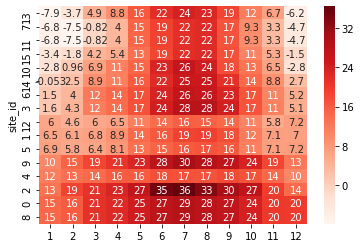

In [43]:
#df_site_temp = pd.pivot_table(df_weather_train, values=['air_temperature'], index = ['site_id'], columns= ['month'],aggfunc=np.mean)
#df_site_temp.columns = ['1','2','3','4','5','6','7','8','9','10','11','12']
#df_site_temp = df_site_temp.sort_values(by='1')
df_site_temp
ax = sns.heatmap(df_site_temp, annot=True, cmap="Reds")

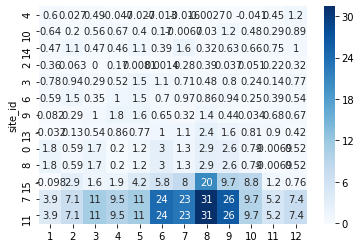

In [79]:
df_site_rain = pd.pivot_table(df_weather_train, values=['precip_depth_1_hr'], index = ['site_id'], columns= ['month'],aggfunc=np.mean)
df_site_rain.columns = ['1','2','3','4','5','6','7','8','9','10','11','12']
df_site_rain = df_site_rain.sort_values(by='8')
ax = sns.heatmap(df_site_rain, annot=True, cmap="Blues")

### Clustering Analysis on weather data

In [83]:
#df_site_weather_study = df_site_temp.merge(df_site_rain, how = 'outer', on = 'site_id', suffixes=['_temp', '_rain'])
#site_id_col = df_site_weather_study.reset_index().site_id
df_site_weather_study = df_site_weather_study.fillna(df_site_weather_study.mean())
df_site_weather_study

,1_temp,2_temp,3_temp,4_temp,5_temp,6_temp,7_temp,8_temp,9_temp,10_temp,...,3_rain,4_rain,5_rain,6_rain,7_rain,8_rain,9_rain,10_rain,11_rain,12_rain
site_id,,,,,,,,,,,,,,,,,,,,,
13,-7.868414,-3.652011,4.913594,8.840556,16.393952,21.854444,23.939919,22.929839,18.652639,11.640323,...,0.540027,0.856944,0.772849,1.031944,1.120968,2.396505,1.584722,0.810484,0.904167,0.415882
7,-6.772157,-7.548865,-0.816201,4.012971,14.843514,19.049791,21.650811,22.318304,16.964067,9.267473,...,11.064103,9.530612,11.130435,24.375000,22.904762,31.418605,26.285714,9.666667,5.189655,7.403361
11,-6.772157,-7.548865,-0.816201,4.012971,14.843514,19.049791,21.650811,22.318304,16.964067,9.267473,...,11.064103,9.530612,11.130435,24.375000,22.904762,31.418605,26.285714,9.666667,5.189655,7.403361
15,-3.407251,-1.845985,4.190694,5.365629,13.396690,18.538955,21.828212,22.326377,17.300000,10.654939,...,1.566176,1.856287,4.182796,5.818182,8.000000,20.480769,9.736842,8.776471,1.160000,0.763636
10,-2.833917,0.958190,6.949731,11.379306,14.609812,23.259444,26.354032,24.463930,17.865972,12.813315,...,0.556452,0.670833,0.403338,0.166667,-0.006720,0.029570,1.177778,0.481183,0.287500,0.885599
14,-0.053028,2.459195,8.902554,11.180972,16.126344,22.274334,25.418011,25.393280,21.434028,14.103360,...,0.465054,0.459722,1.067204,0.391304,1.626027,0.315860,0.629167,0.659946,0.745833,0.998656
6,1.461777,4.048420,12.233065,14.268750,17.366398,23.536389,26.401615,26.058871,23.356745,16.709005,...,0.348118,1.015278,1.533602,0.697222,0.971774,0.860215,0.944367,0.254032,0.391667,0.543011
3,1.625000,4.281583,11.561694,13.827917,17.292742,24.378056,27.777642,27.818683,24.289167,16.980780,...,0.291667,0.523611,1.545332,1.115922,0.705718,0.483176,0.795833,0.236559,0.138889,0.766532
12,5.979704,4.633236,5.959563,6.532406,11.358277,14.065556,15.629973,15.413978,14.408206,10.764919,...,2.375013,2.060112,2.754547,4.965202,4.722819,7.302046,5.619861,2.475729,1.180418,1.725193


In [85]:
df_site_weather_study_normalized = pd.DataFrame(normalize(df_site_weather_study, axis=0), columns=df_site_weather_study.columns)
df_site_weather_study_normalized['site_id'] = site_id_col
df_site_weather_study_normalized = df_site_weather_study_normalized.set_index('site_id')
df_site_weather_study_normalized

,1_temp,2_temp,3_temp,4_temp,5_temp,6_temp,7_temp,8_temp,9_temp,10_temp,...,3_rain,4_rain,5_rain,6_rain,7_rain,8_rain,9_rain,10_rain,11_rain,12_rain
site_id,,,,,,,,,,,,,,,,,,,,,
13,-0.232644,-0.092852,0.098886,0.156156,0.227389,0.240767,0.241594,0.237200,0.217351,0.173955,...,0.032711,0.060001,0.044599,0.028434,0.032508,0.047190,0.039734,0.048008,0.115077,0.037267
7,-0.200231,-0.191929,-0.016426,0.070884,0.205884,0.209869,0.218493,0.230874,0.197674,0.138494,...,0.670191,0.667314,0.642308,0.671631,0.664240,0.618674,0.659068,0.572589,0.660507,0.663413
11,-0.200231,-0.191929,-0.016426,0.070884,0.205884,0.209869,0.218493,0.230874,0.197674,0.138494,...,0.670191,0.667314,0.642308,0.671631,0.664240,0.618674,0.659068,0.572589,0.660507,0.663413
15,-0.100741,-0.046934,0.084338,0.094777,0.185816,0.204241,0.220284,0.230957,0.201589,0.159229,...,0.094869,0.129973,0.241378,0.160315,0.232001,0.403293,0.244134,0.519860,0.147638,0.068429
10,-0.083790,0.024362,0.139863,0.201000,0.202643,0.256246,0.265957,0.253069,0.208184,0.191484,...,0.033706,0.046970,0.023276,0.004592,-0.000195,0.000582,0.029531,0.028502,0.036591,0.079358
14,-0.001568,0.062525,0.179164,0.197497,0.223678,0.245393,0.256511,0.262683,0.249761,0.210763,...,0.028170,0.032189,0.061586,0.010782,0.047155,0.006220,0.015775,0.039091,0.094925,0.089489
6,0.043220,0.102931,0.246191,0.252038,0.240878,0.259297,0.266437,0.269568,0.272165,0.249702,...,0.021087,0.071088,0.088500,0.019211,0.028182,0.016939,0.023678,0.015047,0.049849,0.048659
3,0.048046,0.108859,0.232679,0.244251,0.239856,0.268569,0.280323,0.287773,0.283030,0.253763,...,0.017667,0.036662,0.089177,0.030748,0.020466,0.009514,0.019954,0.014012,0.017677,0.068689
12,0.176801,0.117800,0.119936,0.115386,0.157543,0.154958,0.157733,0.159451,0.167892,0.160872,...,0.143863,0.144245,0.158958,0.136812,0.136962,0.143787,0.140908,0.146646,0.150236,0.154594


In [87]:
#kmean clustering with 4 cluster
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_site_weather_study_normalized)
display(pd.DataFrame(kmeans.cluster_centers_))
y_km = kmeans.fit_predict(df_site_weather_study_normalized)
display(pd.DataFrame({'site_id' : site_id_col, 'cluster' : y_km}).set_index('site_id'))

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.380011,0.404673,0.387730,0.370001,0.320450,0.297969,0.284170,0.277651,0.301865,0.346758,...,0.060325,0.032734,0.046664,0.036241,0.018382,0.029629,0.028173,0.019339,0.034060,0.058201
1,-0.200231,-0.191929,-0.016426,0.070884,0.205884,0.209869,0.218493,0.230874,0.197674,0.138494,...,0.670191,0.667314,0.642308,0.671631,0.664240,0.618674,0.659068,0.572589,0.660507,0.663413
2,-0.045347,0.041165,0.179357,0.210188,0.226889,0.254054,0.262164,0.262058,0.246098,0.215933,...,0.026668,0.049382,0.061427,0.018754,0.025623,0.016089,0.025735,0.028932,0.062824,0.064692
3,0.117790,0.093596,0.117288,0.127434,0.180023,0.176233,0.183083,0.190353,0.191128,0.166003,...,0.131614,0.140677,0.179563,0.142688,0.160722,0.208664,0.166715,0.239949,0.149587,0.133053


,cluster
site_id,
13,0
7,1
11,1
15,3
10,0
14,0
6,0
3,0
12,3


In [88]:
#kmean clustering with 3 cluster
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_site_weather_study_normalized)
display(pd.DataFrame(kmeans.cluster_centers_))
y_km = kmeans.fit_predict(df_site_weather_study_normalized)
display(pd.DataFrame({'site_id' : site_id_col, 'cluster' : y_km}).set_index('site_id'))

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.027158,0.064468,0.151770,0.173409,0.206059,0.219467,0.227017,0.230189,0.221667,0.193742,...,0.073311,0.089958,0.113932,0.073835,0.085667,0.101678,0.088392,0.122717,0.101385,0.095075
1,-0.200231,-0.191929,-0.016426,0.070884,0.205884,0.209869,0.218493,0.230874,0.197674,0.138494,...,0.670191,0.667314,0.642308,0.671631,0.664240,0.618674,0.659068,0.572589,0.660507,0.663413
2,0.380011,0.404673,0.387730,0.370001,0.320450,0.297969,0.284170,0.277651,0.301865,0.346758,...,0.060325,0.032734,0.046664,0.036241,0.018382,0.029629,0.028173,0.019339,0.034060,0.058201


,cluster
site_id,
13,0
7,1
11,1
15,0
10,0
14,0
6,0
3,0
12,0


    4 Clusters is redundant where site15 is grouped into site5,1,12 , whoes rain data is missing and replaced with average.
    SitesID can be grouped two 3 area (above): 
        -Area 0 with low year round temp and moderate or low rain
        -Area 1 with low year round temp and very high rain during summer time (could be a data issue regarding the rain)
        -Area 2 with high year round temp and moderate or low rain

In [90]:
weather_group = pd.DataFrame({'site_id' : site_id_col, 'cluster' : y_km})

In [100]:
# del df_train['Unnamed: 0']
display(df_train.shape)
df_train = df_train.merge(weather_group, how = 'left', on = 'site_id')
display(df_train.shape)

(20216100, 28)

(20216100, 29)

In [103]:
pd.pivot_table(df_train, values=['meter_reading'], index = ['site_id'], columns= ['meter'],aggfunc=[np.mean, 'count'])

mean                                                 count  \
        meter_reading                                         meter_reading   
meter               0            1             2            3             0   
site_id                                                                       
0          226.534701  2295.519514           NaN          NaN      908409.0   
1          162.368825          NaN           NaN    94.955632      447982.0   
2          152.615679   307.081302           NaN    39.412577     1184512.0   
3          125.919304          NaN           NaN          NaN     2370097.0   
4          181.087793          NaN           NaN          NaN      746746.0   
5           31.298845          NaN           NaN          NaN      781776.0   
6          176.275512  2883.095691    706.656994          NaN      315436.0   
7         2041.810732   760.372454    924.572069  1373.096528      104784.0   
8           65.737812          NaN           NaN          NaN      567915.0   
9          179.993583   474.745448    150.442771          NaN     1068748.0   
10          80.414967    59.534407           NaN  1743.240371      236573.0   
11         249.195747    70.294583           NaN   108.937927       43400.0   
12          99.122309          NaN           NaN          NaN      315909.0   
13         244.062354   327.087749  47095.843460          NaN     1236660.0   
14         187.133478  1028.750962   1377.717476   419.422502      890768.0   
15         135.468479    60.417787    734.266849  2874.127520      841195.0   

                                       
                                       
meter           1         2         3  
site_id                                
0        168253.0       NaN       NaN  
1             NaN       NaN  105375.0  
2        863845.0       NaN  481955.0  
3             NaN       NaN       NaN  
4             NaN       NaN       NaN  
5             NaN       NaN       NaN  
6        164107.0  188590.0       NaN  
7        130956.0  104597.0   26344.0  
8             NaN       NaN       NaN  
9        833113.0  777462.0       NaN  
10        78935.0       NaN   95899.0  
11        32656.0       NaN   43403.0  
12            NaN       NaN       NaN  
13       702607.0  772496.0       NaN  
14       743017.0  371457.0  496264.0  
15       464951.0  494111.0   14797.0

In [104]:
pd.pivot_table(df_train, values=['meter_reading'], index = ['cluster'], columns= ['meter'],aggfunc=[np.mean, 'count'])

mean                                               count  \
        meter_reading                                       meter_reading   
meter               0           1             2           3             0   
cluster                                                                     
0          145.777513  696.558598  20468.677297  600.635532       7436396   
1         1516.791227  622.636940    924.572069  586.420746        148184   
2          167.880635  561.338796    150.442771   39.412577       4476330   

                                   
                                   
meter          1        2       3  
cluster                            
0        2153617  1826654  712335  
1         163612   104597   69747  
2        1865211   777462  481955

#### weather data and meter_reading

## 2.Building data analysis

    What's relationship between meter reading (4 type) with building type?
    What's relationship between building's year and meter reading (4 types)
    What's relationship between meter reading per sqfeet (4 type) with building type?
    What's relationship between building's year and meter reading per sqfeet (4 types)

In [105]:
df_building_meta = pd.read_csv('E:/data/Kaggle Energy Prediction/building_metadata.csv')
df_building_meta.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [170]:
df_building_meta.groupby('primary_use').nunique()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
primary_use,,,,,,
Education,15,549,1,538,100,17
Entertainment/public assembly,14,184,1,183,47,8
Food sales and service,3,5,1,5,1,0
Healthcare,6,23,1,23,7,1
Lodging/residential,12,147,1,133,42,11
Manufacturing/industrial,3,12,1,12,5,2
Office,13,279,1,278,53,9
Other,6,25,1,25,6,2
Parking,5,22,1,16,11,3


In [108]:
# create meter_reading_per_sqfeet
df_train['meter_reading_per_sqfeet'] = df_train['meter_reading']/df_train['square_feet']

,building_id,meter,timestamp,meter_reading,hour,meter_avg,meter_std,meter_reading_diff_from_avg,meter_hour_avg,meter_hour_std,...,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,time_adj,hour_adj,cluster,meter_reading_per_sqfeet
0,0,0,2016-01-01 00:00:00,0.0,0,170.825636,380.834307,-170.825636,149.76798,322.885782,...,6.0,20.0,NaN,1019.7,0.0,0.0,7,17,2,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,170.825636,380.834307,-170.825636,149.76798,322.885782,...,6.0,20.0,NaN,1019.7,0.0,0.0,7,17,2,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,170.825636,380.834307,-170.825636,149.76798,322.885782,...,6.0,20.0,NaN,1019.7,0.0,0.0,7,17,2,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,170.825636,380.834307,-170.825636,149.76798,322.885782,...,6.0,20.0,NaN,1019.7,0.0,0.0,7,17,2,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,170.825636,380.834307,-170.825636,149.76798,322.885782,...,6.0,20.0,NaN,1019.7,0.0,0.0,7,17,2,0.0


In [112]:
pd.pivot_table(df_train, values=['meter_reading', 'meter_reading_per_sqfeet'], index = ['primary_use'], columns= ['meter'],aggfunc=[np.mean])

mean                             \
                              meter_reading                              
meter                                     0            1             2   
primary_use                                                              
Education                        245.430567   736.632588  30607.160189   
Entertainment/public assembly    116.197158  1526.434522    615.157744   
Food sales and service            94.794985   372.636543    911.671646   
Healthcare                       297.179204   869.034419   1726.272072   
Lodging/residential              108.596272   417.783481    742.800104   
Manufacturing/industrial          90.659198   301.235984    774.807903   
Office                           157.500952   283.246515   2305.234128   
Other                             69.385202   733.031598    267.810476   
Parking                           58.575775    10.233911   1431.267259   
Public services                   98.712629   476.721950   2728.422804   
Religious worship                  4.592755     8.051416           NaN   
Retail                           138.683212   146.403762           NaN   
Services                          92.203716          NaN  22185.124643   
Technology/science               107.892623   138.134888    132.241012   
Utility                          169.304692  1375.784961    751.839621   
Warehouse/storage                 51.562507          NaN     87.217012   

                                                                               \
                                           meter_reading_per_sqfeet             
meter                                    3                        0         1   
primary_use                                                                     
Education                       300.172583                 0.002146  0.005294   
Entertainment/public assembly  1300.618987                 0.002046  0.013242   
Food sales and service           86.811446                 0.002406  0.008641   
Healthcare                      355.678200                 0.003927  0.006202   
Lodging/residential              57.460218                 0.001500  0.003270   
Manufacturing/industrial               NaN                 0.003510  0.038040   
Office                          245.048437                 0.002043  0.004085   
Other                                  NaN                 0.003015  0.156604   
Parking                                NaN                 0.001433  0.000122   
Public services                 434.909215                 0.002134  0.003909   
Religious worship                      NaN                 0.000622  0.000363   
Retail                                 NaN                 0.004799  0.002766   
Services                               NaN                 0.000929       NaN   
Technology/science              299.821983                 0.003133  0.002030   
Utility                                NaN                 0.011016  0.062655   
Warehouse/storage                      NaN                 0.001531       NaN   

                                                   
                                                   
meter                                 2         3  
primary_use                                        
Education                      0.097866  0.002085  
Entertainment/public assembly  0.006330  0.007048  
Food sales and service         0.019667  0.002510  
Healthcare                     0.010521  0.004125  
Lodging/residential            0.005506  0.000643  
Manufacturing/industrial       0.035211       NaN  
Office                         0.011071  0.004646  
Other                          0.009686       NaN  
Parking                        0.003465       NaN  
Public services                0.011613  0.004846  
Religious worship                   NaN       NaN  
Retail                              NaN       NaN  
Services                       0.443928       NaN  
Technology/science             0.002200  0.002744  
U

Can we further group building type based on size,year,and efficiency?

In [147]:
df_building_stat = df_building_meta[['primary_use', 'square_feet', 'floor_count']].groupby('primary_use').agg('mean').reset_index()

In [148]:
df0 = df_train.loc[df_train.meter == 0,['primary_use','meter_reading','meter_reading_per_sqfeet']].groupby(['primary_use']).agg('mean').reset_index()
df1 = df_train.loc[df_train.meter == 1,['primary_use','meter_reading','meter_reading_per_sqfeet']].groupby(['primary_use']).agg('mean').reset_index()
df2 = df_train.loc[df_train.meter == 2,['primary_use','meter_reading','meter_reading_per_sqfeet']].groupby(['primary_use']).agg('mean').reset_index()
df3 = df_train.loc[df_train.meter == 3,['primary_use','meter_reading','meter_reading_per_sqfeet']].groupby(['primary_use']).agg('mean').reset_index()

In [149]:
#df_building_stat.columns = ['primary_use', 'avg_square_feet', 'avg_floor_count']
df_building_stat = df_building_stat.merge(df0, how = 'left', on = 'primary_use', suffixes=['','_avg_meter0'])
df_building_stat = df_building_stat.merge(df1, how = 'left', on = 'primary_use', suffixes=['','_avg_meter1'])
df_building_stat = df_building_stat.merge(df2, how = 'left', on = 'primary_use', suffixes=['','_avg_meter2'])
df_building_stat = df_building_stat.merge(df3, how = 'left', on = 'primary_use', suffixes=['','_avg_meter3'])
df_building_stat

,primary_use,square_feet,floor_count,meter_reading,meter_reading_per_sqfeet,meter_reading_avg_meter1,meter_reading_per_sqfeet_avg_meter1,meter_reading_avg_meter2,meter_reading_per_sqfeet_avg_meter2,meter_reading_avg_meter3,meter_reading_per_sqfeet_avg_meter3
0,Education,104329.000000,4.732558,245.430567,0.002146,736.632588,0.005294,30607.160189,0.097866,300.172583,0.002085
1,Entertainment/public assembly,80584.070652,2.089286,116.197158,0.002046,1526.434522,0.013242,615.157744,0.006330,1300.618987,0.007048
2,Food sales and service,38485.000000,NaN,94.794985,0.002406,372.636543,0.008641,911.671646,0.019667,86.811446,0.002510
3,Healthcare,140480.869565,1.000000,297.179204,0.003927,869.034419,0.006202,1726.272072,0.010521,355.678200,0.004125
4,Lodging/residential,85368.605442,6.333333,108.596272,0.001500,417.783481,0.003270,742.800104,0.005506,57.460218,0.000643
5,Manufacturing/industrial,41120.833333,1.666667,90.659198,0.003510,301.235984,0.038040,774.807903,0.035211,NaN,NaN
6,Office,87065.627240,3.725000,157.500952,0.002043,283.246515,0.004085,2305.234128,0.011071,245.048437,0.004646
7,Other,31456.560000,1.076923,69.385202,0.003015,733.031598,0.156604,267.810476,0.009686,NaN,NaN
8,Parking,279341.772727,2.666667,58.575775,0.001433,10.233911,0.000122,1431.267259,0.003465,NaN,NaN
9,Public services,64947.282051,2.048780,98.712629,0.002134,476.721950,0.003909,2728.422804,0.011613,434.909215,0.004846


In [163]:
# df_building_stat = df_building_stat.set_index('primary_use')
# df_building_stat_index = df_building_stat.index
# df_building_stat_normalized = df_building_stat.fillna(df_building_stat.mean())
# df_building_stat_normalized = pd.DataFrame(normalize(df_building_stat_normalized, axis=0, ), columns=df_building_stat_normalized.columns)
# df_building_stat_normalized['primary_use'] = df_building_stat_index
# df_building_stat_normalized = df_building_stat_normalized.set_index('primary_use')
df_building_stat_normalized

,square_feet,floor_count,meter_reading,meter_reading_per_sqfeet,meter_reading_avg_meter1,meter_reading_per_sqfeet_avg_meter1,meter_reading_avg_meter2,meter_reading_per_sqfeet_avg_meter2,meter_reading_avg_meter3,meter_reading_per_sqfeet_avg_meter3
primary_use,,,,,,,,,,
Education,0.241340,0.385396,0.444720,0.143950,0.271372,0.029954,0.792056,0.208243,0.161740,0.136623
Entertainment/public assembly,0.186412,0.170141,0.210549,0.137266,0.562332,0.074930,0.015919,0.013469,0.700804,0.461806
Food sales and service,0.089026,0.218241,0.171769,0.161402,0.137278,0.048896,0.023592,0.041849,0.046776,0.164439
Healthcare,0.324969,0.081435,0.538489,0.263403,0.320148,0.035093,0.044673,0.022387,0.191648,0.270257
Lodging/residential,0.197480,0.515756,0.196777,0.100619,0.153910,0.018503,0.019222,0.011717,0.030961,0.042133
Manufacturing/industrial,0.095123,0.135725,0.164275,0.235432,0.110974,0.215248,0.020051,0.074923,0.207482,0.234626
Office,0.201405,0.303346,0.285392,0.137031,0.104347,0.023116,0.059655,0.023557,0.132038,0.304443
Other,0.072767,0.087699,0.125726,0.202265,0.270046,0.886145,0.006930,0.020611,0.207482,0.234626
Parking,0.646190,0.217160,0.106139,0.096154,0.003770,0.000690,0.037039,0.007373,0.207482,0.234626


In [159]:
df_building_stat_index

Index(['Education', 'Entertainment/public assembly', 'Food sales and service',
       'Healthcare', 'Lodging/residential', 'Manufacturing/industrial',
       'Office', 'Other', 'Parking', 'Public services', 'Religious worship',
       'Retail', 'Services', 'Technology/science', 'Utility',
       'Warehouse/storage'],
      dtype='object', name='primary_use')

In [168]:
#kmean clustering with 5 cluster
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_building_stat_normalized)
display(pd.DataFrame(kmeans.cluster_centers_ , columns = df_building_stat_normalized.columns))
y_km = kmeans.fit_predict(df_building_stat_normalized)
display(pd.DataFrame({'primary_use' : df_building_stat_index, 'building_cluster' : y_km}))
df_building_cluster = pd.DataFrame({'primary_use' : df_building_stat_index, 'building_cluster' : y_km})

,square_feet,floor_count,meter_reading,meter_reading_per_sqfeet,meter_reading_avg_meter1,meter_reading_per_sqfeet_avg_meter1,meter_reading_avg_meter2,meter_reading_per_sqfeet_avg_meter2,meter_reading_avg_meter3,meter_reading_per_sqfeet_avg_meter3
0,0.186412,0.170141,0.210549,0.137266,0.562332,0.074930,0.015919,0.013469,0.700804,0.461806
1,0.187615,0.224319,0.199114,0.164883,0.118949,0.047003,0.047436,0.040580,0.166793,0.222882
2,0.464176,0.218241,0.167073,0.062304,0.194601,0.124173,0.574110,0.944605,0.207482,0.234626
3,0.072350,0.125285,0.216253,0.470611,0.388439,0.620341,0.013193,0.095447,0.207482,0.234626
4,0.241340,0.385396,0.444720,0.143950,0.271372,0.029954,0.792056,0.208243,0.161740,0.136623


,primary_use,building_cluster
0,Education,4
1,Entertainment/public assembly,2
2,Food sales and service,0
3,Healthcare,0
4,Lodging/residential,0
5,Manufacturing/industrial,0
6,Office,0
7,Other,3
8,Parking,0
9,Public services,0


Based on kmean clustering algo, below building type are worth to be treated differently
    -Education building has high meter0 and meter2 total reading
    -Entertainment/public assembly buildings tend to have large space with very low efficiency on meter2
    -Utility and Other has tend to have small space with very low efficiency on meter0 and meter1
    -Service building has high efficiency on meter1 and meter2

In [169]:
#add more building features to df_train
display(df_train.shape)
df_train = df_train.merge(df_building_cluster, how = 'left', on = 'primary_use')
display(df_train.shape)
df_train.head()

(20216100, 30)

(20216100, 31)

,building_id,meter,timestamp,meter_reading,hour,meter_avg,meter_std,meter_reading_diff_from_avg,meter_hour_avg,meter_hour_std,...,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,time_adj,hour_adj,cluster,meter_reading_per_sqfeet,building_cluster
0,0,0,2016-01-01 00:00:00,0.0,0,170.825636,380.834307,-170.825636,149.76798,322.885782,...,20.0,NaN,1019.7,0.0,0.0,7,17,2,0.0,4
1,1,0,2016-01-01 00:00:00,0.0,0,170.825636,380.834307,-170.825636,149.76798,322.885782,...,20.0,NaN,1019.7,0.0,0.0,7,17,2,0.0,4
2,2,0,2016-01-01 00:00:00,0.0,0,170.825636,380.834307,-170.825636,149.76798,322.885782,...,20.0,NaN,1019.7,0.0,0.0,7,17,2,0.0,4
3,3,0,2016-01-01 00:00:00,0.0,0,170.825636,380.834307,-170.825636,149.76798,322.885782,...,20.0,NaN,1019.7,0.0,0.0,7,17,2,0.0,4
4,4,0,2016-01-01 00:00:00,0.0,0,170.825636,380.834307,-170.825636,149.76798,322.885782,...,20.0,NaN,1019.7,0.0,0.0,7,17,2,0.0,4


In [200]:
#df_train.to_csv('E:/data/Kaggle Energy Prediction/train_cleaned_part2.csv')

In [2]:
df_train = pd.read_csv('E:/data/Kaggle Energy Prediction/train_cleaned_part2.csv')

## 3.Hour(adjusted) and Month

In [22]:
# len(set(df_train.building_id))# 1449
#df_train[['hour_adj', 'meter', 'meter_reading']].groupby(['hour_adj', 'meter']).agg('mean')
#df_hour_adj_meter = pd.pivot_table(df_train, values=['meter_reading'], index = ['hour_adj'], columns= ['meter'],aggfunc=[np.mean])
#df_hour_adj_meter.columns = ['meter0','meter1','meter2','meter3']
pd.concat([df_hour_adj_meter, df_hour_adj_meter.rank()], axis=1)

,meter0,meter1,meter2,meter3,meter0,meter1,meter2,meter3
hour_adj,,,,,,,,
0,176.543989,598.898794,13665.540458,398.194565,14.0,10.0,9.0,19.0
1,180.823417,614.818130,13684.982981,382.987385,16.0,11.0,11.0,13.0
2,184.232010,652.334050,13906.073017,382.685481,18.0,14.0,12.0,12.0
3,186.672362,682.409953,13910.003305,397.418239,19.0,16.0,13.0,18.0
4,188.954569,703.833638,14154.385614,395.102031,21.0,18.0,15.0,17.0
5,191.012912,716.243744,14438.928513,393.563863,23.0,20.0,17.0,16.0
6,191.957919,731.823577,14964.504452,376.360909,24.0,22.0,24.0,9.0
7,190.958455,736.306947,14729.079546,370.342915,22.0,24.0,20.0,4.0
8,188.759613,735.020258,14609.167276,365.299868,20.0,23.0,18.0,3.0


In [23]:
df_hour_meter = pd.pivot_table(df_train, values=['meter_reading'], index = ['hour'], columns= ['meter'],aggfunc=[np.mean])
df_hour_meter.columns = ['meter0','meter1','meter2','meter3']
pd.concat([df_hour_meter, df_hour_meter.rank()], axis=1)

,meter0,meter1,meter2,meter3,meter0,meter1,meter2,meter3
hour,,,,,,,,
0,149.767980,564.039248,13669.764691,386.022336,5.0,6.0,10.0,14.0
1,149.514803,570.414787,13411.909926,390.127241,4.0,7.0,8.0,15.0
2,145.749767,537.276482,13206.171159,384.222507,3.0,4.0,7.0,13.0
3,144.769748,524.683006,12970.694253,382.805120,1.0,3.0,4.0,11.0
4,145.608994,511.690923,13008.347989,377.505681,2.0,1.0,5.0,9.0
5,150.333052,520.029195,12770.245006,400.391979,6.0,2.0,2.0,17.0
6,158.605425,550.470845,12680.144639,412.359925,8.0,5.0,1.0,22.0
7,168.216926,577.452750,12951.941320,416.766111,11.0,8.0,3.0,23.0
8,175.592923,585.904347,13080.619138,428.200868,14.0,10.0,6.0,24.0


In [26]:
# df_hour_adj_meter = df_hour_adj_meter.rank().reset_index()
# df_hour_adj_meter.columns = ['hour_adj', 'hour_adj_meter0_rank', 'hour_adj_meter1_rank', 'hour_adj_meter2_rank', 'hour_adj_meter3_rank']
# df_train = df_train.merge(df_hour_adj_meter, how = 'left', on = 'hour_adj')
# df_hour_meter = df_hour_meter.rank().reset_index()
# df_hour_meter.columns = ['hour', 'hour_meter0_rank', 'hour_meter1_rank', 'hour_meter2_rank', 'hour_meter3_rank']
# df_train = df_train.merge(df_hour_meter, how = 'left', on = 'hour')
df_train.head()

,Unnamed: 0,building_id,meter,timestamp,meter_reading,hour,meter_avg,meter_std,meter_reading_diff_from_avg,meter_hour_avg,...,meter_reading_per_sqfeet,building_cluster,hour_adj_meter0_rank,hour_adj_meter1_rank,hour_adj_meter2_rank,hour_adj_meter3_rank,hour_meter0_rank,hour_meter1_rank,hour_meter2_rank,hour_meter3_rank
0,0,0,0,2016-01-01 00:00:00,0.0,0,170.825636,380.834307,-170.825636,149.76798,...,0.0,4,4.0,5.0,7.0,14.0,5.0,6.0,10.0,14.0
1,1,1,0,2016-01-01 00:00:00,0.0,0,170.825636,380.834307,-170.825636,149.76798,...,0.0,4,4.0,5.0,7.0,14.0,5.0,6.0,10.0,14.0
2,2,2,0,2016-01-01 00:00:00,0.0,0,170.825636,380.834307,-170.825636,149.76798,...,0.0,4,4.0,5.0,7.0,14.0,5.0,6.0,10.0,14.0
3,3,3,0,2016-01-01 00:00:00,0.0,0,170.825636,380.834307,-170.825636,149.76798,...,0.0,4,4.0,5.0,7.0,14.0,5.0,6.0,10.0,14.0
4,4,4,0,2016-01-01 00:00:00,0.0,0,170.825636,380.834307,-170.825636,149.76798,...,0.0,4,4.0,5.0,7.0,14.0,5.0,6.0,10.0,14.0


In [28]:
df_month_meter = pd.pivot_table(df_train, values=['meter_reading'], index = ['month'], columns= ['meter'],aggfunc=[np.mean])
df_month_meter.columns = ['meter0','meter1','meter2','meter3']
df_month_meter = df_month_meter.rank().reset_index()
df_month_meter.columns = ['month', 'month_meter0_rank', 'month_meter1_rank', 'month_meter2_rank', 'month_meter3_rank']
df_train = df_train.merge(df_month_meter, how = 'left', on = 'month')
display(df_train.shape)
df_train.head()

(20216100, 44)

,Unnamed: 0,building_id,meter,timestamp,meter_reading,hour,meter_avg,meter_std,meter_reading_diff_from_avg,meter_hour_avg,...,hour_adj_meter2_rank,hour_adj_meter3_rank,hour_meter0_rank,hour_meter1_rank,hour_meter2_rank,hour_meter3_rank,month_meter0_rank,month_meter1_rank,month_meter2_rank,month_meter3_rank
0,0,0,0,2016-01-01 00:00:00,0.0,0,170.825636,380.834307,-170.825636,149.76798,...,7.0,14.0,5.0,6.0,10.0,14.0,2.0,1.0,7.0,12.0
1,1,1,0,2016-01-01 00:00:00,0.0,0,170.825636,380.834307,-170.825636,149.76798,...,7.0,14.0,5.0,6.0,10.0,14.0,2.0,1.0,7.0,12.0
2,2,2,0,2016-01-01 00:00:00,0.0,0,170.825636,380.834307,-170.825636,149.76798,...,7.0,14.0,5.0,6.0,10.0,14.0,2.0,1.0,7.0,12.0
3,3,3,0,2016-01-01 00:00:00,0.0,0,170.825636,380.834307,-170.825636,149.76798,...,7.0,14.0,5.0,6.0,10.0,14.0,2.0,1.0,7.0,12.0
4,4,4,0,2016-01-01 00:00:00,0.0,0,170.825636,380.834307,-170.825636,149.76798,...,7.0,14.0,5.0,6.0,10.0,14.0,2.0,1.0,7.0,12.0


In [29]:
df_train.to_csv('E:/data/Kaggle Energy Prediction/train_cleaned_part2.csv')

## 4.MeterType

{'whiskers': [<matplotlib.lines.Line2D at 0x18fe782eac8>,
 'caps': [<matplotlib.lines.Line2D at 0x18fe782eeb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x18fe782e6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x18fe7869828>],
 'fliers': [<matplotlib.lines.Line2D at 0x18fe7869b70>],
 'means': []}

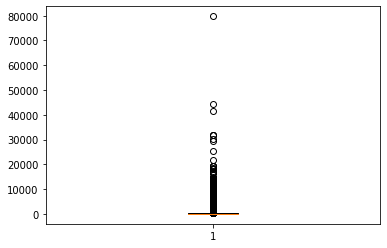

In [33]:
#plt.hist(df_train.loc[df_train.meter == 0, 'meter_reading'], bins= 250)
plt.boxplot(df_train.loc[df_train.meter == 0, 'meter_reading'])

In [36]:
print('meter 0')
display(df_train.loc[df_train.meter == 0, 'meter_reading'].describe())
print('meter 1')
display(df_train.loc[df_train.meter == 1, 'meter_reading'].describe())
print('meter 2')
display(df_train.loc[df_train.meter == 2, 'meter_reading'].describe())
print('meter 3')
display(df_train.loc[df_train.meter == 3, 'meter_reading'].describe())

meter 0


count    1.206091e+07
mean     1.708256e+02
std      3.808343e+02
min      0.000000e+00
25%      1.950000e+01
50%      6.283190e+01
75%      1.700750e+02
max      7.976900e+04
Name: meter_reading, dtype: float64

meter 1


count    4.182440e+06
mean     6.333639e+02
std      7.988213e+03
min      0.000000e+00
25%      1.132880e+01
50%      1.204870e+02
75%      4.643140e+02
max      8.803740e+05
Name: meter_reading, dtype: float64

meter 2


count    2.708713e+06
mean     1.388219e+04
std      4.183135e+05
min      0.000000e+00
25%      4.575000e+01
50%      2.578120e+02
75%      1.035320e+03
max      2.190470e+07
Name: meter_reading, dtype: float64

meter 3


count    1.264037e+06
mean     3.858668e+02
std      2.508172e+03
min      0.000000e+00
25%      0.000000e+00
50%      3.962370e+01
75%      2.412850e+02
max      1.601870e+05
Name: meter_reading, dtype: float64

In [66]:
#df_train['timestamp'] = pd.to_datetime(df_train['timestamp'])
df_train_meter0_ts \
    = df_train.loc[df_train.meter == 0, ['timestamp','meter_reading']].groupby('timestamp').agg({'meter_reading':['sum', 'mean']}).reset_index()
df_train_meter1_ts \
    = df_train.loc[df_train.meter == 1, ['timestamp','meter_reading']].groupby('timestamp').agg({'meter_reading':['sum', 'mean']}).reset_index()
df_train_meter2_ts \
    = df_train.loc[df_train.meter == 2, ['timestamp','meter_reading']].groupby('timestamp').agg({'meter_reading':['sum', 'mean']}).reset_index()
df_train_meter3_ts \
    = df_train.loc[df_train.meter == 3, ['timestamp','meter_reading']].groupby('timestamp').agg({'meter_reading':['sum', 'mean']}).reset_index()

df_train_meter0_ts.columns = ['timestamp','meter_reading_sum','meter_reading_avg']
df_train_meter1_ts.columns = ['timestamp','meter_reading_sum','meter_reading_avg']
df_train_meter2_ts.columns = ['timestamp','meter_reading_sum','meter_reading_avg']
df_train_meter3_ts.columns = ['timestamp','meter_reading_sum','meter_reading_avg']

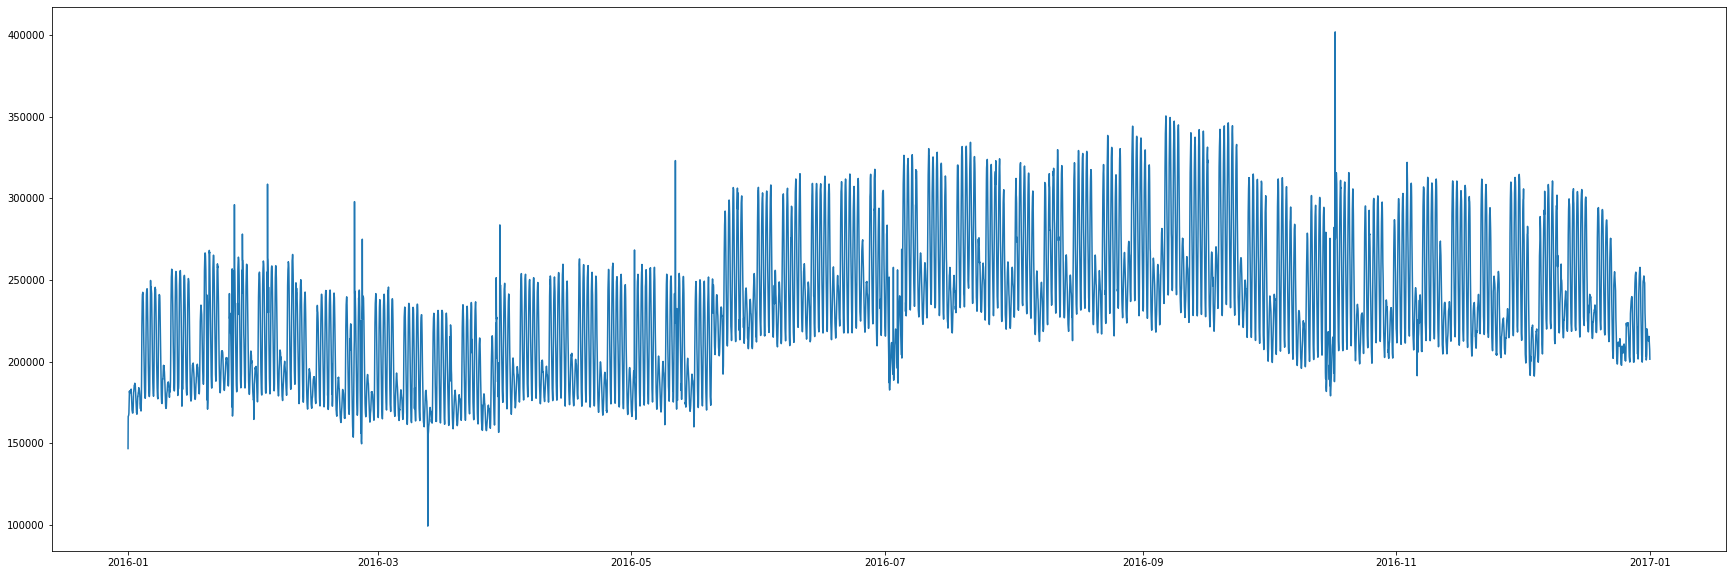

In [64]:
plt.figure(figsize=(30, 10))
plt.plot(df_train_meter0_ts.timestamp, df_train_meter0_ts.meter_reading_sum)
plt.show()

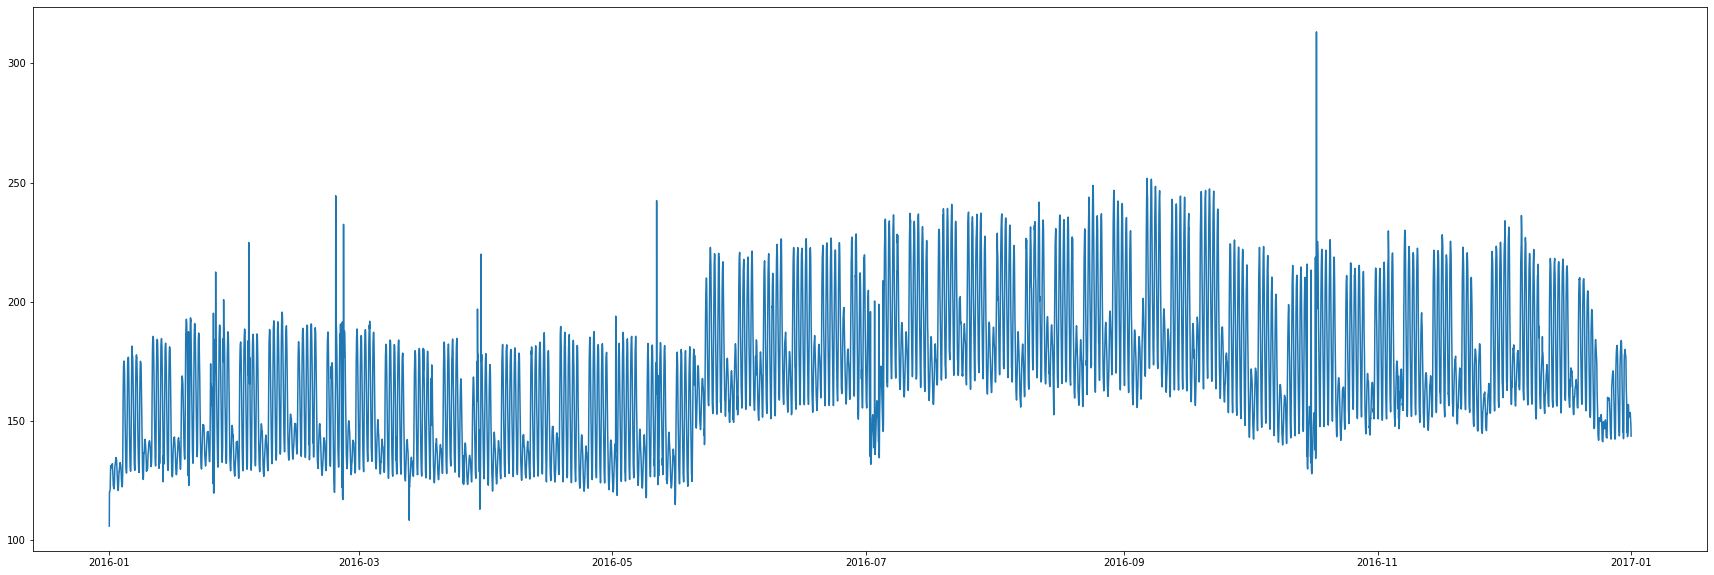

In [65]:
plt.figure(figsize=(30, 10))
plt.plot(df_train_meter0_ts.timestamp, df_train_meter0_ts.meter_reading_avg)
plt.show()

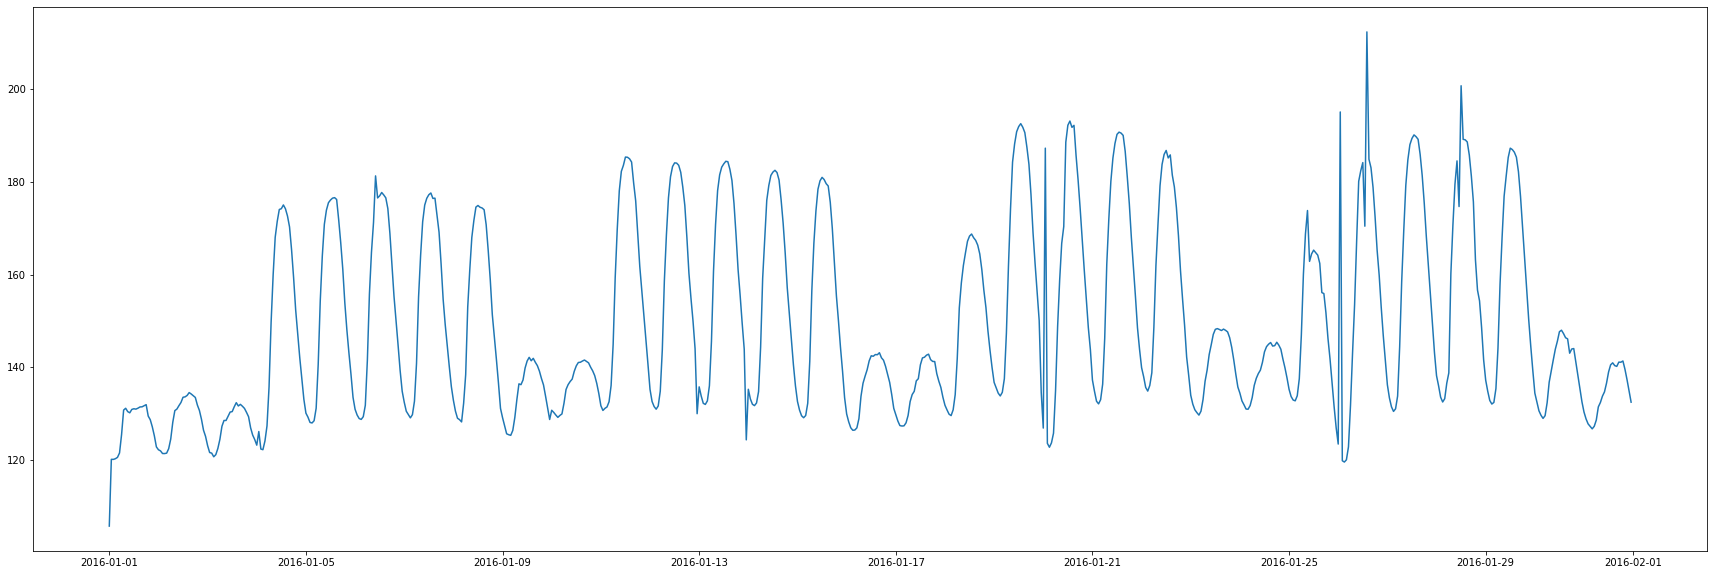

In [70]:
#check one month
plt.figure(figsize=(30, 10))
plt.plot(df_train_meter0_ts.loc[df_train_meter0_ts.timestamp < '2016-02-01 00:00:00', 'timestamp']
         , df_train_meter0_ts.loc[df_train_meter0_ts.timestamp < '2016-02-01 00:00:00', 'meter_reading_avg'])
plt.show()

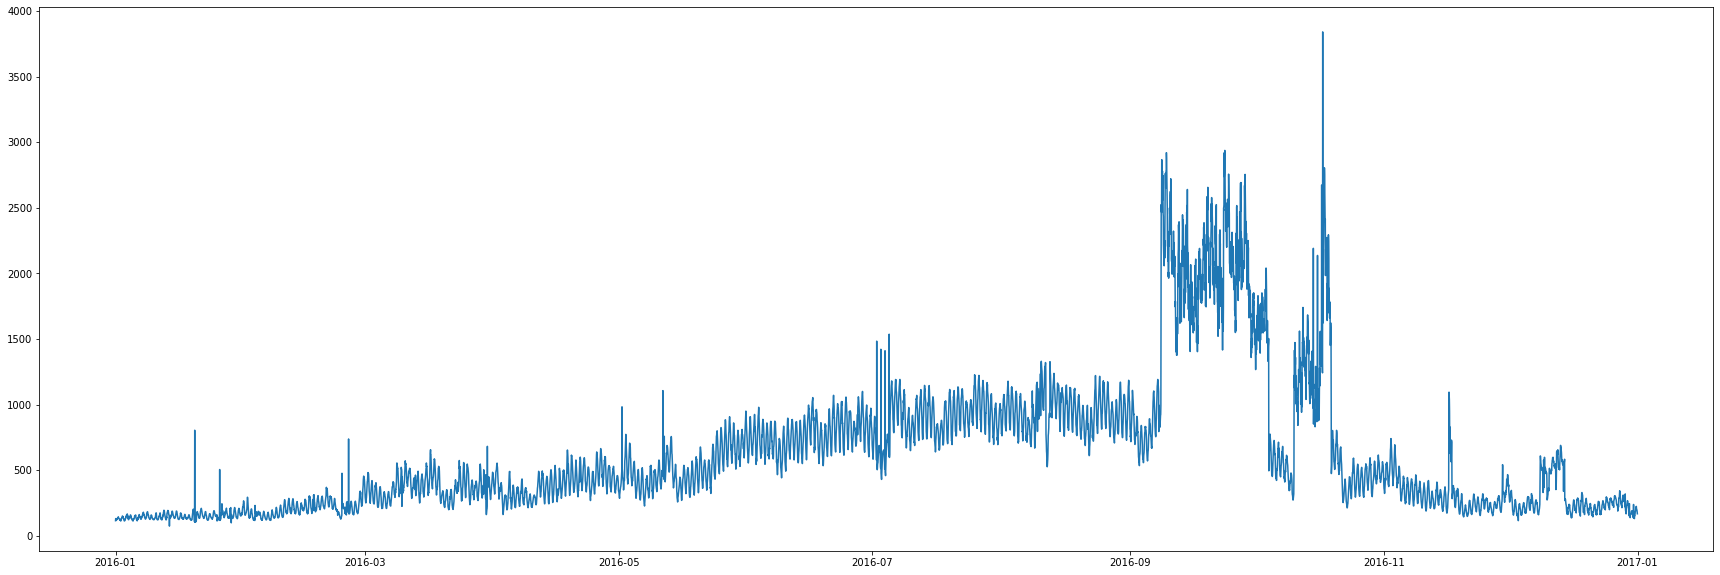

In [72]:
#check meter1
plt.figure(figsize=(30, 10))
plt.plot(df_train_meter1_ts.timestamp, df_train_meter1_ts.meter_reading_avg)
plt.show()

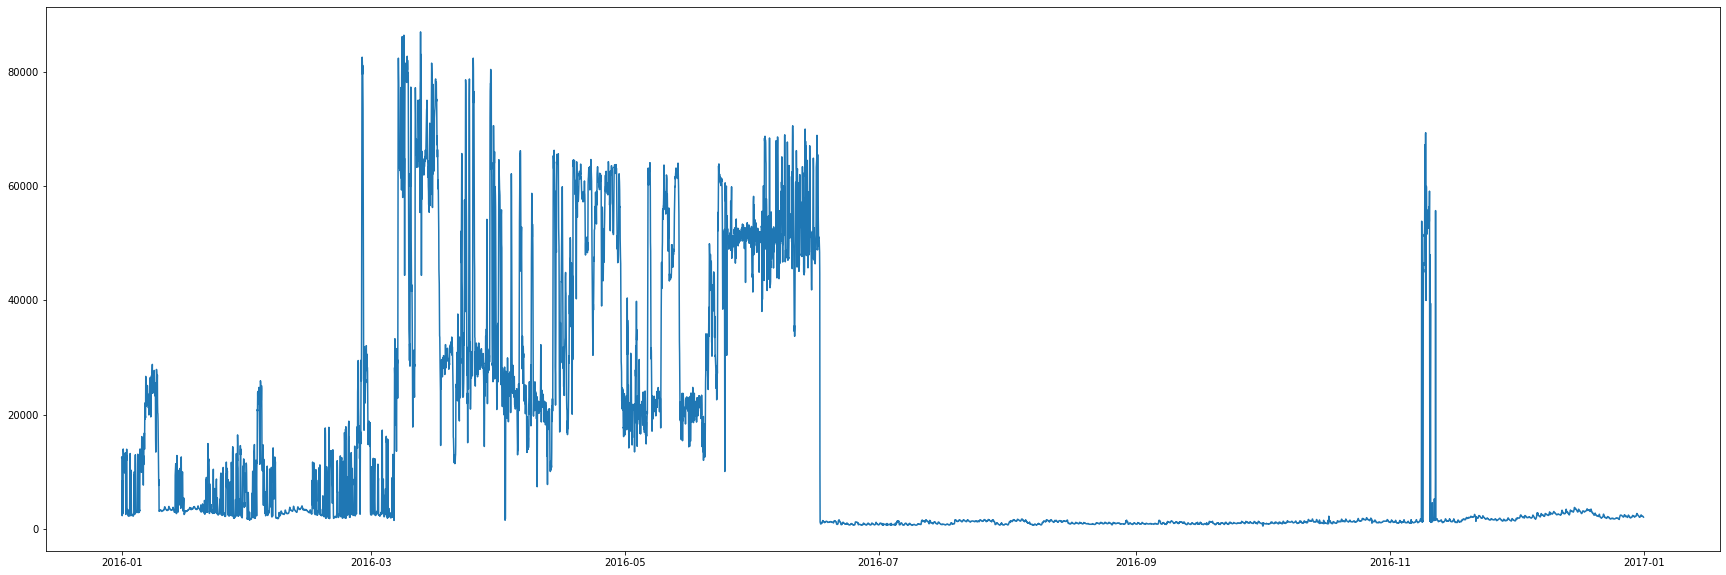

In [71]:
#check meter2
plt.figure(figsize=(30, 10))
plt.plot(df_train_meter2_ts.timestamp, df_train_meter2_ts.meter_reading_avg)
plt.show()

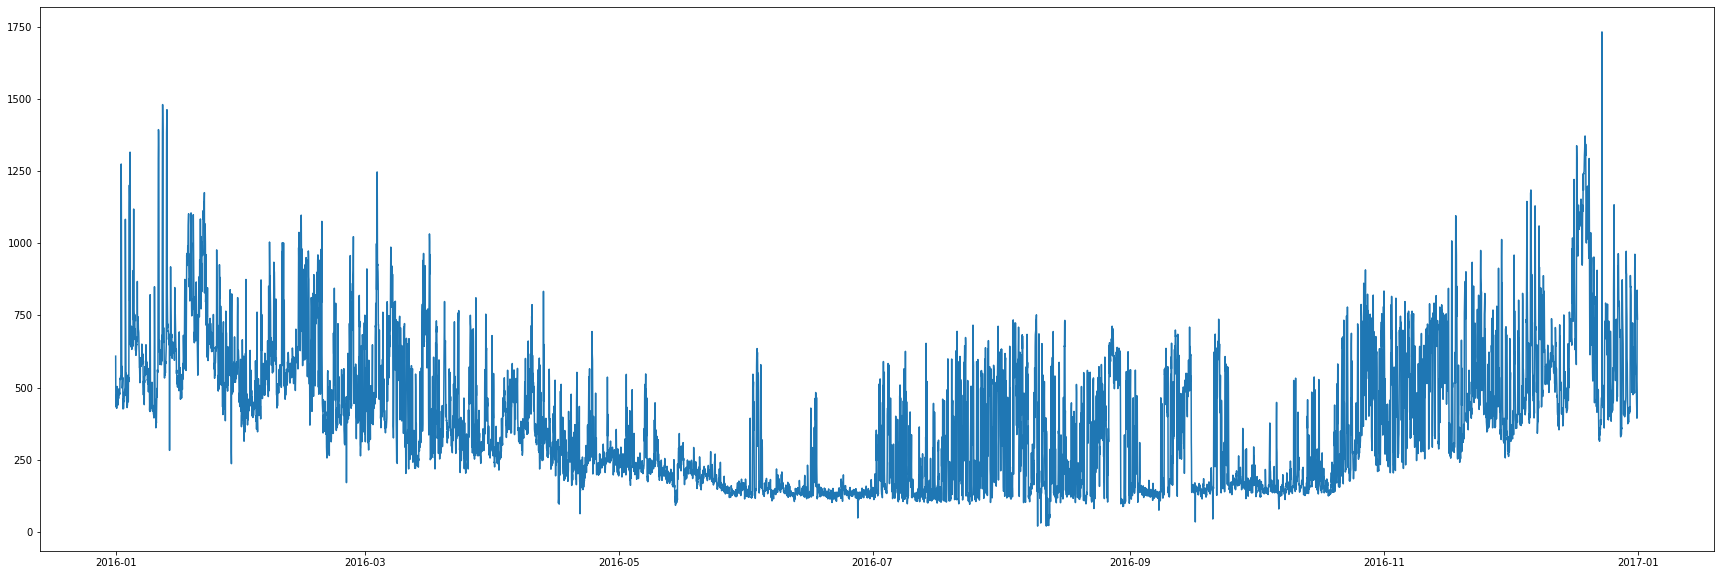

In [73]:
#check meter3
plt.figure(figsize=(30, 10))
plt.plot(df_train_meter3_ts.timestamp, df_train_meter3_ts.meter_reading_avg)
plt.show()

In [83]:
#use adjusted hour
df_train['year'] = df_train['timestamp'].dt.year
df_train['day'] = df_train['timestamp'].dt.day
df_train['adj_year_month_day_hour'] = df_train.year*1000000 + df_train.month*10000 + df_train.day*100 + df_train.hour
df_train['adj_year_month_day_hour'] = pd.to_datetime(df_train.adj_year_month_day_hour,format='%Y%m%d%H')
df_train_meter0_ts_adj \
    = df_train.loc[df_train.meter == 0, ['adj_year_month_day_hour','meter_reading']].groupby('adj_year_month_day_hour').agg({'meter_reading':['sum', 'mean']}).reset_index()
df_train_meter1_ts_adj \
    = df_train.loc[df_train.meter == 1, ['adj_year_month_day_hour','meter_reading']].groupby('adj_year_month_day_hour').agg({'meter_reading':['sum', 'mean']}).reset_index()
df_train_meter2_ts_adj \
    = df_train.loc[df_train.meter == 2, ['adj_year_month_day_hour','meter_reading']].groupby('adj_year_month_day_hour').agg({'meter_reading':['sum', 'mean']}).reset_index()
df_train_meter3_ts_adj \
    = df_train.loc[df_train.meter == 3, ['adj_year_month_day_hour','meter_reading']].groupby('adj_year_month_day_hour').agg({'meter_reading':['sum', 'mean']}).reset_index()

df_train_meter0_ts_adj.columns = ['adj_year_month_day_hour','meter_reading_sum','meter_reading_avg']
df_train_meter1_ts_adj.columns = ['adj_year_month_day_hour','meter_reading_sum','meter_reading_avg']
df_train_meter2_ts_adj.columns = ['adj_year_month_day_hour','meter_reading_sum','meter_reading_avg']
df_train_meter3_ts_adj.columns = ['adj_year_month_day_hour','meter_reading_sum','meter_reading_avg']

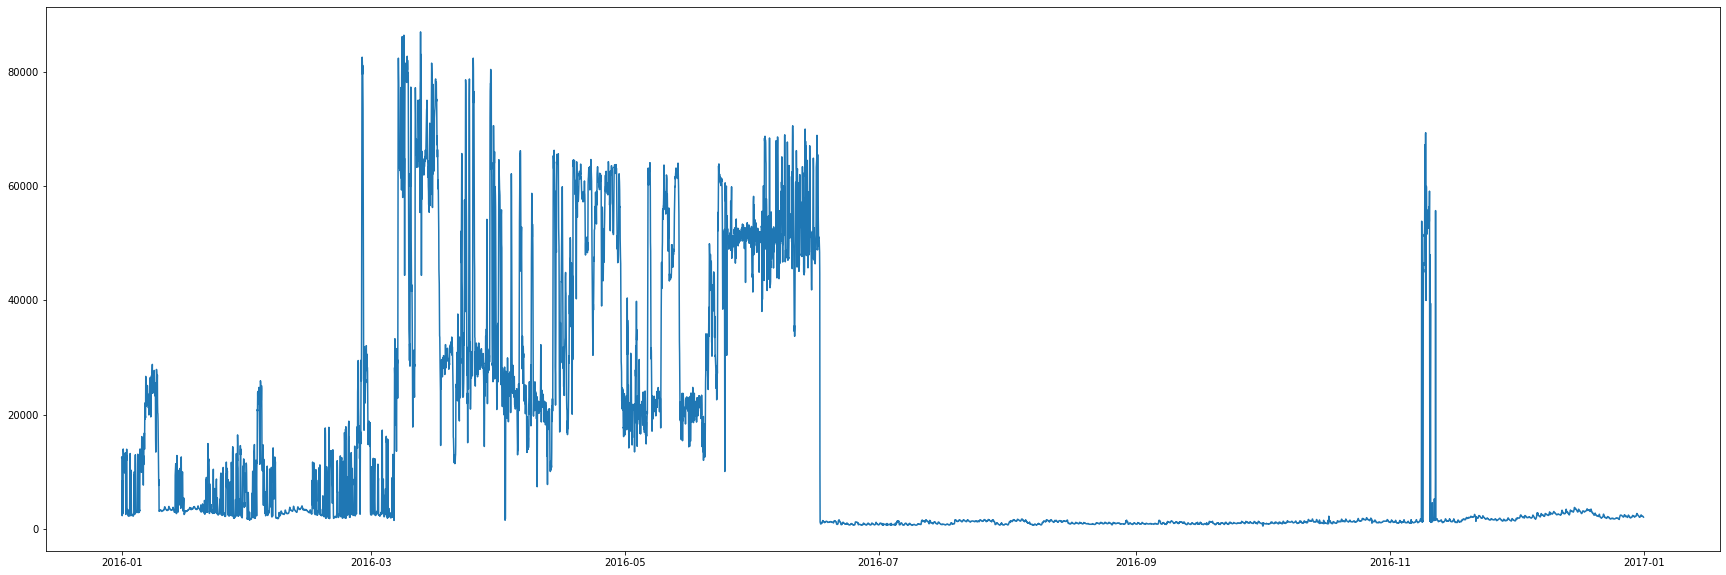

In [84]:
#check meter2
plt.figure(figsize=(30, 10))
plt.plot(df_train_meter2_ts_adj.adj_year_month_day_hour, df_train_meter2_ts_adj.meter_reading_avg)
plt.show()